In [14]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt

В качестве случайнного непрерывного распределения я взял betaprime распределение(понравилось название). Оно определяется двумя параметрами a, b.

In [15]:
a, b = 5, 6

Ниже я построих гистограмму выборки из betaprime распределения из 1000 элементов и теоретическую функцию плотности.

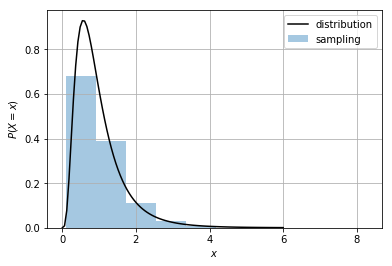

In [85]:
bp = sts.betaprime(a, b)
random_x = bp.rvs(size=1000)

fig, ax = plt.subplots(1, 1)
ax.hist(random_x, normed=True, alpha=0.4, label="sampling")

x = np.linspace(0,6,100)
y = bp.pdf(x)
ax.plot(x, y, color="black", label="distribution")
ax.legend(loc='best')
plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')
plt.grid()

plt.show()

generator - генерирует выборку средних для n элементов размера size и возвращает ее в виде numpy массива.
Так же найдены среднее и дисперсия выбранного мной распределения.

In [67]:
def generator(n, size):
    bp = sts.betaprime(a, b)
    m = np.array([np.mean(bp.rvs(size=n)) for i in range(0, size)])
    return m
    
n_3 = generator(3, 1000)
n_10 = generator(10, 1000)
n_50 = generator(50, 1000)
n_100 = generator(100, 1000)

mean, var = sts.betaprime.stats(a, b, moments='mv')

Среднее и дисперсия для взятого мной betaprime распределения, найдены с помощью функции stats.
Среднее для нормального распределения, описывающего распределение средних выбранного распределения будет равно среднему betaprime распределения(извиняюсь за дикую тафтологию). СКО будет равно корню из дисперсии выбранного распределения, поделенной на количество элементов в выборке.

В блоке кода ниже строятся гистаграммы распределения выборочных средних и их приближений, для выборок n равных 3, 10, 50, 100.

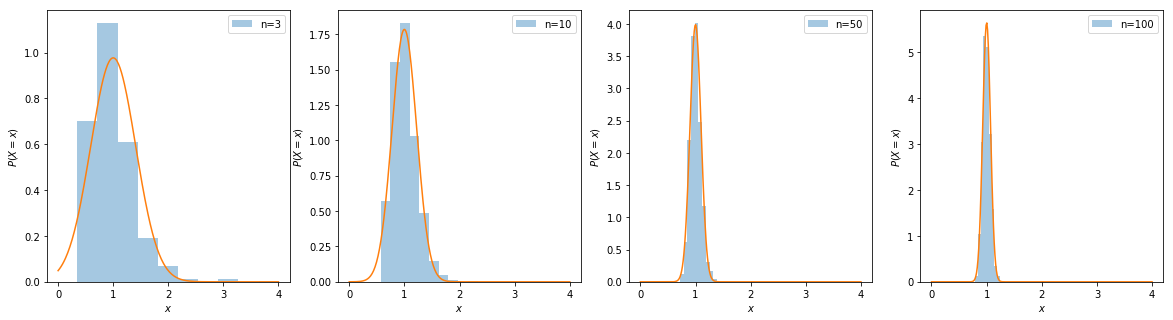

In [84]:
import math

fig, ax = plt.subplots(1, 4, figsize=(20,5))
x = np.linspace(0,4,300)

ax[0].hist(n_3, normed=True, alpha=0.4, label="n=3")
norm_rv = sts.norm(loc=mean, scale=math.sqrt(var/3))
pdf = norm_rv.pdf(x)
ax[0].plot(x, pdf)
ax[0].legend(loc='best')
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$P(X=x)$')

ax[1].hist(n_10, normed=True, alpha=0.4, label="n=10")
norm_rv = sts.norm(loc=mean, scale=math.sqrt(var/10))
pdf = norm_rv.pdf(x)
ax[1].plot(x, pdf)
ax[1].legend(loc='best')
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$P(X=x)$')

ax[2].hist(n_50, normed=True, alpha=0.4, label="n=50")
norm_rv = sts.norm(loc=mean, scale=math.sqrt(var/50))
pdf = norm_rv.pdf(x)
ax[2].plot(x, pdf)
ax[2].legend(loc='best')
ax[2].set_xlabel('$x$')
ax[2].set_ylabel('$P(X=x)$')

ax[3].hist(n_100, normed=True, alpha=0.4, label="n=100")
norm_rv = sts.norm(loc=mean, scale=math.sqrt(var/100))
pdf = norm_rv.pdf(x)
ax[3].plot(x, pdf)
ax[3].legend(loc='best')
ax[3].set_xlabel('$x$')
ax[3].set_ylabel('$P(X=x)$')

plt.show()

Можно заметить, что с ростом n - выборки из распределения, точность аппроксимации распределения выборочных средних нормальным увеличивается. Для 100, разница между гистограммой и теоретической кривой почти незаметна, тогда как для 3 видны явные отклонения.

Также для маленьких n распределение средних имеет большой размах, при увеличении n размах становится меньше, а пик - острее.

In [12]:
import math
def pyas(l, k):
    return l**k/math.factorial(k)*math.exp(-l)
sum = 0.0
for i in range(0, 5):
    sum = sum + pyas(3, i)
print(1-sum)

0.18473675547622792
